In [ ]:
!pip3 install transformers
!pip3 install emoji

In [2]:
from google.colab import drive 
drive.mount('/content/drive')
%cd drive/MyDrive/XAI_gitlab/conecept-x-for-emotion-detection-2/

Mounted at /content/drive
/content/drive/MyDrive/XAI_gitlab/conecept-x-for-emotion-detection-2


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from Utils.TextProcessing import encode_text, TokenizerSingleton

In [6]:
os.chdir('/content/drive/My Drive/emotion_detection')
os.getcwd() # use this directory as root, all logs and model checkpoints are saved here

'/content/drive/My Drive/emotion_detection'

In [7]:
data_df = pd.read_csv("{}/datasets/combined_data.csv".format(os.getcwd()), sep='\t')
data_df = data_df[data_df.dataset.isin(np.unique("Empathetic Dialogues"))]

# Data Description


This data table contains texts from several datasets combined together. It contains  
versatile variants text. The sources for texts include Reddit Posts,  
tweets from different users, texts from dialgues coming from English textbooks  and manually collected sentences which were used for chat bot building. Merged datasets include  


1.   [Empathetic Dialogues](https://github.com/facebookresearch/EmpatheticDialogues), [Paper](https://arxiv.org/pdf/1811.00207v5.pdf)
2.   [CrowdFlower Tweet Data](https://www.kaggle.com/pashupatigupta/emotion-detection-from-text)
3.   [GoEmotions Reddit Posts](https://github.com/google-research/google-research/tree/master/goemotions), [Paper](https://arxiv.org/pdf/2005.00547v2.pdf)
4.   [DailyDialogue dialogue text](http://yanran.li/dailydialog), [Paper](https://arxiv.org/pdf/1710.03957.pdf)


The versatility of texts that may help in build more robust emotion classifier. That is to say, a model can learn to discern emotional patterns both from contemporary style of social media texts and from something more formal, such as texts found in *EmpatheticDialogues* and *DailyDialogue* datasets.

Texts coming from different datasets have several kinds of emotion labels. Some use very fine grained labels while some have labels only for small amount of emotions.  For instance, *EmpatheticDialogues* datasets uses 32 labels. To this end, we coalesce fine grained labels from the data into 6 basic emotions according  to Parrots emotion hierarchy ([Parrots Emotion Grouping](https://en.wikipedia.org/wiki/Emotion_classification)). A more visual explanation is given in the following wheel [Wheel of Emotions](https://www.becalmwithtati.com/wp-content/uploads/2019/02/Mindfulness_for_Emotions.jpeg).  

This way, we obtain the *broadEmo* label in the dataset. Fine level emotion label is also present in the data so that both brad and fine emotions can be predicted with a model.  

Moreover, the dataset name is also placed with each row so that dataset subsetting can be performed. This may be useful to train models only on specific kind of data.

In [9]:
print(data_df.isnull().sum())

sentence    0
broadEmo    0
fineEmo     0
dataset     0
dtype: int64


In [10]:
print("\nSentiment Counts:")
print(data_df.broadEmo.value_counts())
print()
classesBroad = data_df.broadEmo.unique().tolist()
print(classesBroad)


Sentiment Counts:
Joy         6869
Sad         5234
Anger       3995
Fear        2932
Other       2139
Surprise    2074
Love        1346
Name: broadEmo, dtype: int64

['Sad', 'Love', 'Joy', 'Anger', 'Fear', 'Other', 'Surprise']


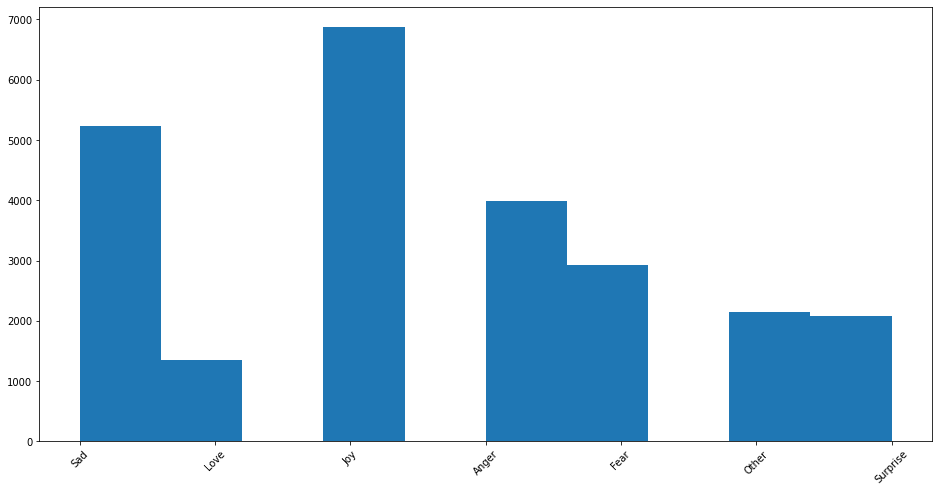

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.hist(data_df['broadEmo'])

ax.set_xticklabels(list(classesBroad), rotation=45)
plt.show()

In [12]:
print("\nSentiment Counts:")
print(data_df.fineEmo.value_counts())
print()
classesFine = data_df.fineEmo.unique().tolist()
print(classesFine)


Sentiment Counts:
surprise          1274
excitement         928
annoyance          870
anger              854
sadness            851
pride              850
gratitude          808
lonely             805
impressed          800
fear               785
confident          780
disgusted          779
hopeful            778
worry              772
terrified          768
disappointment     766
joy                766
prepared           758
nostalgic          756
guilty             751
jealous            749
anticipating       746
furious            743
embarrassment      736
content            730
devastated         700
sentimental        687
caring             659
trusting           635
ashamed            625
apprehensive       607
faithful           473
Name: fineEmo, dtype: int64

['guilty', 'caring', 'lonely', 'excitement', 'sadness', 'hopeful', 'anger', 'joy', 'disappointment', 'faithful', 'content', 'annoyance', 'terrified', 'nostalgic', 'gratitude', 'trusting', 'surprise', 'ashamed', 'impr

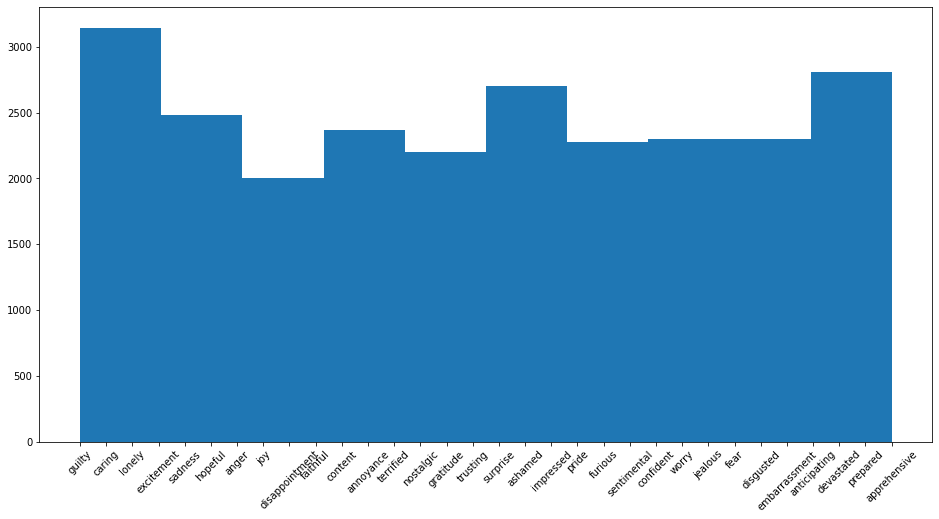

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.hist(data_df['fineEmo'])

ax.set_xticklabels(list(classesFine), rotation=45)
plt.show()

Token indices sequence length is longer than the specified maximum sequence length for this model (132 > 128). Running this sequence through the model will result in indexing errors


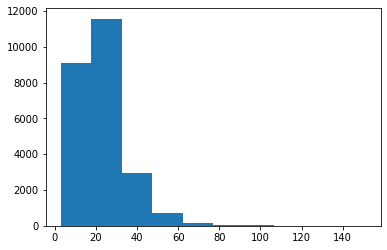

In [21]:
tokenizer = TokenizerSingleton.get_tokenizer_instance()

token_lens = []
for txt in data_df.sentence:
  tokens = tokenizer.encode(txt)
  token_lens.append(len(tokens))

fig, ax = plt.subplots()
ax.hist(token_lens)
plt.show()

In [22]:
# padding and truncation should be ok, not that many sentences cross max_length of
# BERTweet

arr = np.array(token_lens)
print(sum(arr[arr > 128]))
max(token_lens)

threshold_len = 128

283
